# Data Analysis with Chocolate
#### Analysing the dataset of <a href="https://www.kaggle.com/rtatman/chocolate-bar-ratings">Chocolate Bar Ratings</a> to unearth key insights hidden within the data

<h3>Context</h3>
<p>Chocolate is one of the most popular candies in the world. Each year, residents of the United States collectively eat more than 2.8 billions pounds. However, not all chocolate bars are created equal! This dataset contains expert ratings of over 1,700 individual chocolate bars, along with information on their regional origin, percentage of cocoa, the variety of chocolate bean used and where the beans were grown.</p>
<h3>Rating System</h3>
<ul>
    <li>5= Elite (Transcending beyond the ordinary limits)</li>
    <li>4= Premium (Superior flavor development, character and style)</li>
    <li>3= Satisfactory(3.0) to praiseworthy(3.75) (well made with special qualities)</li>
    <li>2= Disappointing (Passable but contains at least one significant flaw)</li>
    <li>1= Unpleasant (mostly unpalatable)</li>
</ul>
<h3>Acknowledgements</h3>
<ul><li>The dataset used here have been acquired from <a href= "https://www.kaggle.com/rtatman/chocolate-bar-ratings">Rachael Tatman's Chocolate Bar Ratings</a> dataset on Kaggle.</li>
<li>The original ratings were compiled by Brady Brelinski, Founding Member of the Manhattan Chocolate Society. For up-to-date information, as well as additional content (including interviews with craft chocolate makers), please see his website: <a href="http://flavorsofcacao.com/index.html">Flavors of Cacao</a></li></ul>

## Loading Data


In [1]:
# Import necessary libraries
import pandas as pd #data-wrangling library
import matplotlib.pyplot as plt #data-visualization library
import seaborn as sns #data-visualization library

In [2]:
# load the dataset from local storage
df=pd.read_csv("Dataset/flavors_of_cacao.csv")

# Undestanding the basic ground information of my data
def all_about_my_data(df):
    print("Here is some Basic Ground Info about your Data:\n")
    
    # Shape of the dataframe
    print("Number of Instances:",df.shape[0])
    print("Number of Features:",df.shape[1])
    
    # Summary Stats
    print("\nSummary Stats:")
    print(df.describe())
    
    # Missing Value Inspection
    print("\nMissing Values:")
    print(df.isna().sum())

all_about_my_data(df)

Here is some Basic Ground Info about your Data:

Number of Instances: 1795
Number of Features: 9

Summary Stats:
               REF  Review\nDate       Rating
count  1795.000000   1795.000000  1795.000000
mean   1035.904735   2012.325348     3.185933
std     552.886365      2.927210     0.478062
min       5.000000   2006.000000     1.000000
25%     576.000000   2010.000000     2.875000
50%    1069.000000   2013.000000     3.250000
75%    1502.000000   2015.000000     3.500000
max    1952.000000   2017.000000     5.000000

Missing Values:
Company \n(Maker-if known)           0
Specific Bean Origin\nor Bar Name    0
REF                                  0
Review\nDate                         0
Cocoa\nPercent                       0
Company\nLocation                    0
Rating                               0
Bean\nType                           1
Broad Bean\nOrigin                   1
dtype: int64


In [3]:
df.shape

(1795, 9)

## The Tantrums of the Feature Names
Imagine an unsuspecting analyst runs the **df.head()** command for this dataset and then tries to view the first 5 entries of the **Review Date** feature based on the **head()** command's output. What does he get?

In [4]:
# Using a try-except error handling function
try :
    df["Review Date"].head()
except :
    print("An error occurred!")

An error occurred!


**This is what he gets!!**

This error in reality is a "Feature not found error" i.e the command fails to identify **Review Date** as a feature (The large error statement has been replaced with the simpler output statement for ease of understanding)

<br>What went wrong? 

In [5]:
# Inspect feature names
df.dtypes

Company \n(Maker-if known)            object
Specific Bean Origin\nor Bar Name     object
REF                                    int64
Review\nDate                           int64
Cocoa\nPercent                        object
Company\nLocation                     object
Rating                               float64
Bean\nType                            object
Broad Bean\nOrigin                    object
dtype: object

#### The above cell's output makes a revelation about our data and it is not a very pleasant one!
The feature names are a bit messy as the names have the <strong>"\n" or "newline"</strong> character amidst them (as describe by our **df.dtypes** command)and this will lead to <strong>unidentifiable</strong> errors and if identified, they will need <strong>excruciating</strong> methods of rectification(Nobody prefers going to each feature name and renaming it explicitly!).<br>

In [6]:
# Cleaning our feature names
cols = list(df.columns)

# Function to replace newline characters and spaces in the feature names
def rec_features(feature_names):
    rec_feat = []
    for f in feature_names:
        rec_feat.append(((f.casefold()).replace("\n","_")).replace(" ","_"))
    return rec_feat

print("Feature Names before Cleaning:")
print(cols)
print("\nFeature Names after Cleaning:")
print(rec_features(cols))


Feature Names before Cleaning:
['Company\xa0\n(Maker-if known)', 'Specific Bean Origin\nor Bar Name', 'REF', 'Review\nDate', 'Cocoa\nPercent', 'Company\nLocation', 'Rating', 'Bean\nType', 'Broad Bean\nOrigin']

Feature Names after Cleaning:
['company\xa0_(maker-if_known)', 'specific_bean_origin_or_bar_name', 'ref', 'review_date', 'cocoa_percent', 'company_location', 'rating', 'bean_type', 'broad_bean_origin']


In [18]:
l1=[1,2,3,4,5]
l2=[10,20,30,60,70]
list(zip(l1,l2))

[(1, 10), (2, 20), (3, 30), (4, 60), (5, 70)]

Now, our features look much safer than they were before. However, the **"company\x..." feature still looks very convoluted**. Let's edit that with some manual removal.
<br>
Finally, we shall re-assign the new feature names to our dataframe.

In [7]:
# Manual Removal
new_feature_names = rec_features(cols)
new_feature_names[0] = "company"

# Re-assigning feature names
df=df.rename(columns=dict(zip(df.columns,new_feature_names)))
df.dtypes

company                              object
specific_bean_origin_or_bar_name     object
ref                                   int64
review_date                           int64
cocoa_percent                        object
company_location                     object
rating                              float64
bean_type                            object
broad_bean_origin                    object
dtype: object

**The features names look a lot more friendly now**!

## Are we Missing Something?
#### Identifying missing values within our dataset and solving the problem

In [8]:
# Checking out if we have missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   company                           1795 non-null   object 
 1   specific_bean_origin_or_bar_name  1795 non-null   object 
 2   ref                               1795 non-null   int64  
 3   review_date                       1795 non-null   int64  
 4   cocoa_percent                     1795 non-null   object 
 5   company_location                  1795 non-null   object 
 6   rating                            1795 non-null   float64
 7   bean_type                         1794 non-null   object 
 8   broad_bean_origin                 1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


As per the above output, there are just two missing values in our dataset.

In [9]:
df[['bean_type', 'broad_bean_origin']].head()

,bean_type,broad_bean_origin
0,,Sao Tome
1,,Togo
2,,Togo
3,,Togo
4,,Peru


*BUT WAIT!*

The **bean_type** feature clearly has more empty values according to the above cell's output even though the **df.info()** command only depicts 1 missing value! So, why this conundrum?<br>
Let's check it out with a bit of **"Intuitively Written Test Code"**.

In [10]:
# What are these missing values in "bean_type" encoded as?

print(df['bean_type'].value_counts().head())
print("Missing Spaces encoded as:")
list(df['bean_type'][0:10])

                        887
Trinitario              419
Criollo                 153
Forastero                87
Forastero (Nacional)     52
Name: bean_type, dtype: int64
Missing Spaces encoded as:


['\xa0',
 '\xa0',
 '\xa0',
 '\xa0',
 '\xa0',
 'Criollo',
 '\xa0',
 'Criollo',
 'Criollo',
 '\xa0']

Oops...so we have **887 instances** in which "bean_type" is encoded as **space** or **\xa0**. 

In [11]:
df['bean_type'] = df['bean_type'].replace({'\xa0':None})
df['bean_type'] = df['bean_type'].fillna(df['bean_type'].mode()[0])
df['bean_type']

0       Trinitario
1       Trinitario
2       Trinitario
3       Trinitario
4       Trinitario
           ...    
1790    Trinitario
1791     Forastero
1792     Forastero
1793    Trinitario
1794    Trinitario
Name: bean_type, Length: 1795, dtype: object

In [12]:
df['cocoa_percent']

0       63%
1       70%
2       70%
3       70%
4       70%
       ... 
1790    70%
1791    65%
1792    65%
1793    62%
1794    65%
Name: cocoa_percent, Length: 1795, dtype: object

Thus, we have filled those weird ambiguous missing values with a much better alternative.


## Convert Cocoa_percent to numerical values
#### The % notation in 'cocoa_percent' is going to be a perpetual pain later on as it masks a numerical feature to be of an object dtype. So, let's make that conversion next.

In [13]:
# Making that much needed conversion

df['cocoa_percent']=df['cocoa_percent'].str.replace('%','').astype(float)/100
df.head()

,company,specific_bean_origin_or_bar_name,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_bean_origin
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,Trinitario,Sao Tome
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,Trinitario,Togo
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,Trinitario,Togo
3,A. Morin,Akata,1680,2015,0.70,France,3.50,Trinitario,Togo
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,Trinitario,Peru


In [14]:
d5 = df.groupby('review_date').aggregate({'cocoa_percent':'mean'})
d5=d5.reset_index()
d5

,review_date,cocoa_percent
0,2006,0.710000
1,2007,0.720390
2,2008,0.726989
3,2009,0.704431
4,2010,0.707793
5,2011,0.709697
6,2012,0.715282
7,2013,0.722663
8,2014,0.722530
9,2015,0.720140


## The Effect of Time - How did the Quality of Chocolate change over the years?

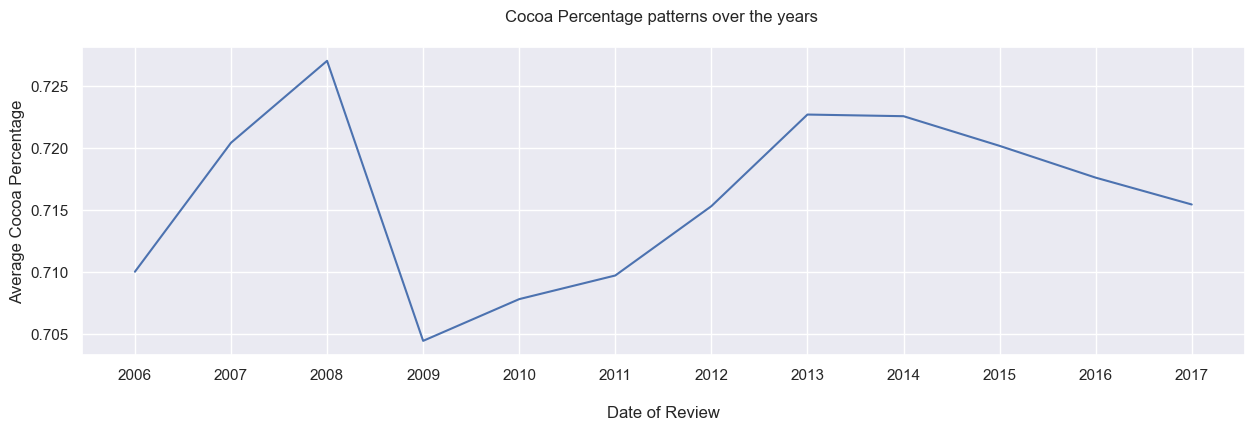

In [15]:
# Cocoa Percentage patterns over the years

d5 = df.groupby('review_date').aggregate({'cocoa_percent':'mean'})
d5 = d5.reset_index()

# Plotting
sns.set()
plt.figure(figsize=(15, 4))
ax = sns.lineplot(x='review_date', y='cocoa_percent', data=d5)
ax.set(xticks=d5.review_date.values)
plt.xlabel("\nDate of Review")
plt.ylabel("Average Cocoa Percentage")
plt.title("Cocoa Percentage patterns over the years \n")
plt.show()

#### Percentage of Cocoa over the years (Taking the average amounts per year)
* The highest percentage of cocoa in a chocolate bar came in 2008 and was about 73%.
* The lowest percentage of cocoa followed in the very next year, 2009 and hit 69%.
* There was a steep rise in the amount of cocoa in chocolate from 2009 to 2013 where it rose to about 72.2% from 69%.
* From 2014, a steady decline in cocoa percentage in chocolate bars have been noticed and in 2017, it stands at just above 71.5%.

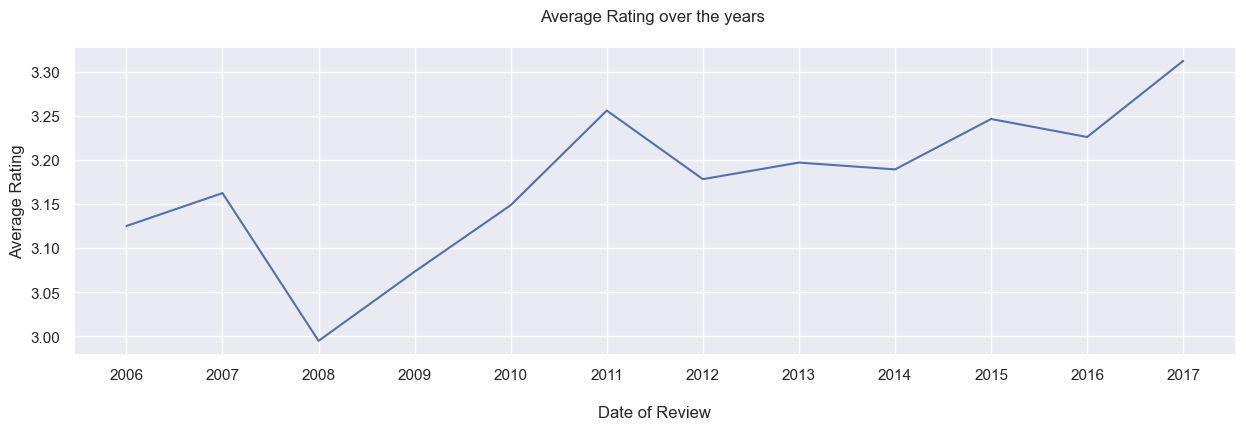

In [16]:
# Rating patterns over the years

d6 = df.groupby('review_date').aggregate({'rating':'mean'})
d6 = d6.reset_index()

# Plotting
sns.set()
plt.figure(figsize=(15, 4))
ax = sns.lineplot(x='review_date', y='rating', data=d6)
ax.set(xticks=d6.review_date.values)
plt.xlabel("\nDate of Review")
plt.ylabel("Average Rating")
plt.title("Average Rating over the years \n")
plt.show()

#### Rating over the years (Taking the average amounts per year)
* The lowest ever average rating was around 3 and it came in 2008.
* Since then to 2011, there was a steady increase in average ratings and in 2011 it was at 3.26.
* From 2011 to 2017, there have been several fluctuations in the ratings, and in 2017 the rating lies at its apex at around 3.31.

### The Year 2008 - Year of Coincidence or something more than that?
* The highest average cocoa percent was in 2008
* The lowest average ratings came in 2008

The next year 2009 saw two major changes from the previous year :
* There was a drastic reduce in cocoa content on an average
* The average rating across the world had an increase from 3.00 to 3.08 in 2008

Is this an indication of how chocolate producers tried reducing their cocoa content to make better chocolate? <br>**OR**<br>Was this just coincidence?
<br>
**Let's leave that to your speculation!**

In [17]:
d = df['company'].value_counts().sort_values(ascending=False).head(5)
d

Soma        47
Bonnat      27
Fresco      26
Pralus      25
A. Morin    23
Name: company, dtype: int64

## The Chocolate Companies - The Best, The Patterns

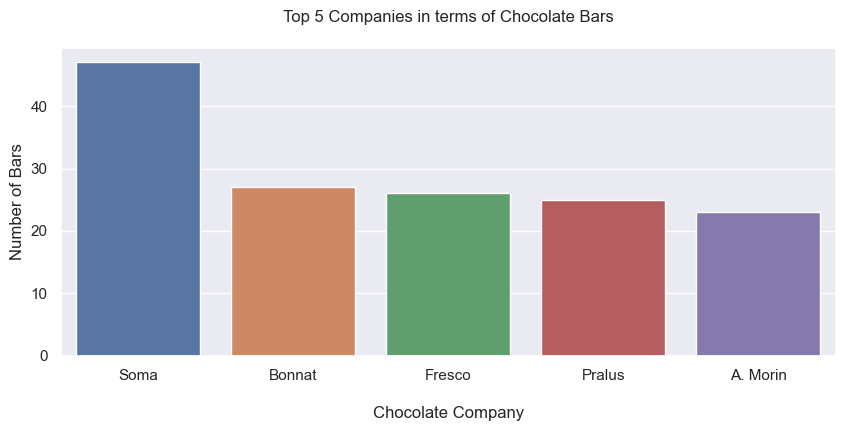

In [18]:
# Top 5 companies in terms of chocolate bars in this dataset
d = df['company'].value_counts().sort_values(ascending=False).head(5)
d = pd.DataFrame(d)
d = d.reset_index() # dataframe with top 5 companies

# Plotting
sns.set()
plt.figure(figsize=(10,4))
sns.barplot(x='index', y='company', data=d)
plt.xlabel("\nChocolate Company")
plt.ylabel("Number of Bars")
plt.title("Top 5 Companies in terms of Chocolate Bars\n")
plt.show()

* Soma has the highest number of chocolate bars in this dataset with 47.

### Distribution of Chocolate Bars

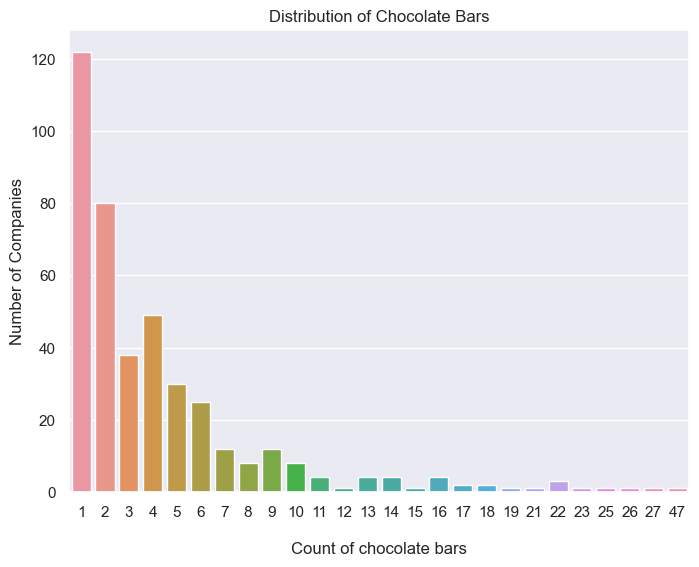

In [19]:
sns.set()
plt.figure(figsize=(8,6))
sns.countplot(x=df['company'].value_counts().sort_values(ascending=False))
plt.xlabel("\nCount of chocolate bars")
plt.ylabel("Number of Companies")
plt.title("Distribution of Chocolate Bars")
plt.show()

* **120+ companies** have just one entry in this dataset.

### Top 5 companies in terms of average ratings

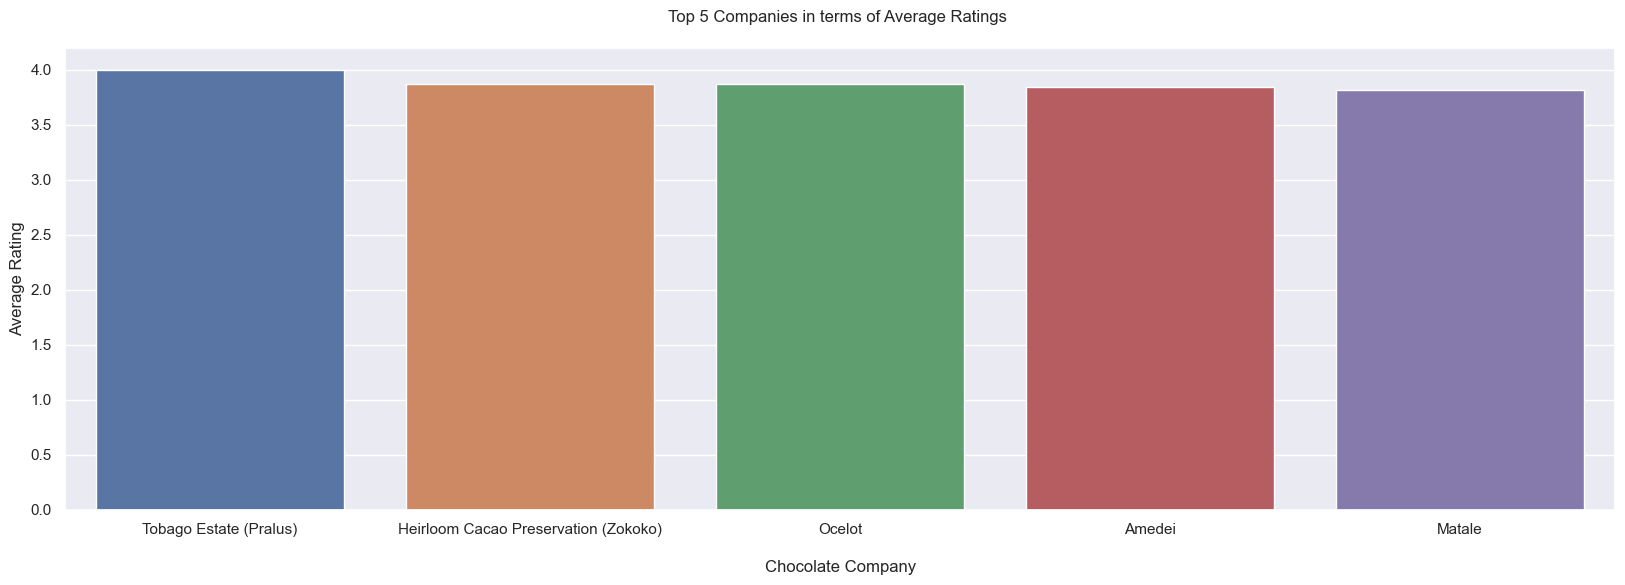

In [20]:
d2 = df.groupby('company').aggregate({'rating':'mean'})
d2 = d2.sort_values('rating', ascending=False).head(5)
d2 = d2.reset_index()

# Plotting
sns.set()
plt.figure(figsize=(20, 6))
sns.barplot(x='company', y='rating', data=d2)
plt.xlabel("\nChocolate Company")
plt.ylabel("Average Rating")
plt.title("Top 5 Companies in terms of Average Ratings \n")
plt.show()

* Tobago Estate (Pralus) has a rating of 4.0 (the highest), however it has only one chocolate bar entry in this dataset.
* These top 5 companies have very high ratings, however they have very low chocolate bars in the dataset.
* Amedei has 13. Rest all have under 5.

### Top 5 companies in terms of average Cocoa Percentage

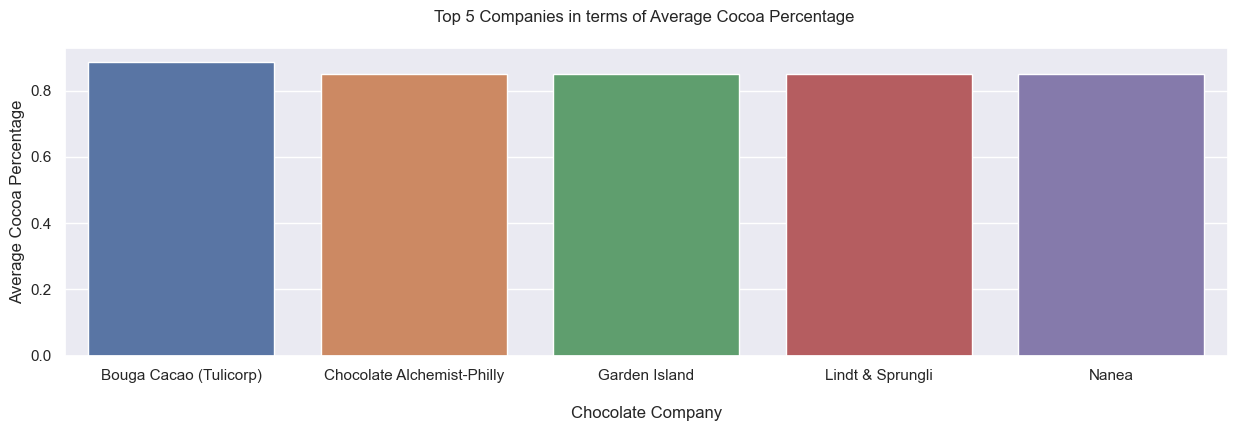

In [21]:
d2 = df.groupby('company').aggregate({'cocoa_percent':'mean'})
d2 = d2.sort_values('cocoa_percent', ascending=False).head(5)
d2 = d2.reset_index()

# Plotting
sns.set()
plt.figure(figsize=(15, 4))
sns.barplot(x='company', y='cocoa_percent', data=d2)
plt.xlabel("\nChocolate Company")
plt.ylabel("Average Cocoa Percentage")
plt.title("Top 5 Companies in terms of Average Cocoa Percentage \n")
plt.show()

* All these companies produce chocolate with very high cocoa percentage (more than 80%)

### Average rating over the years (Top 5)

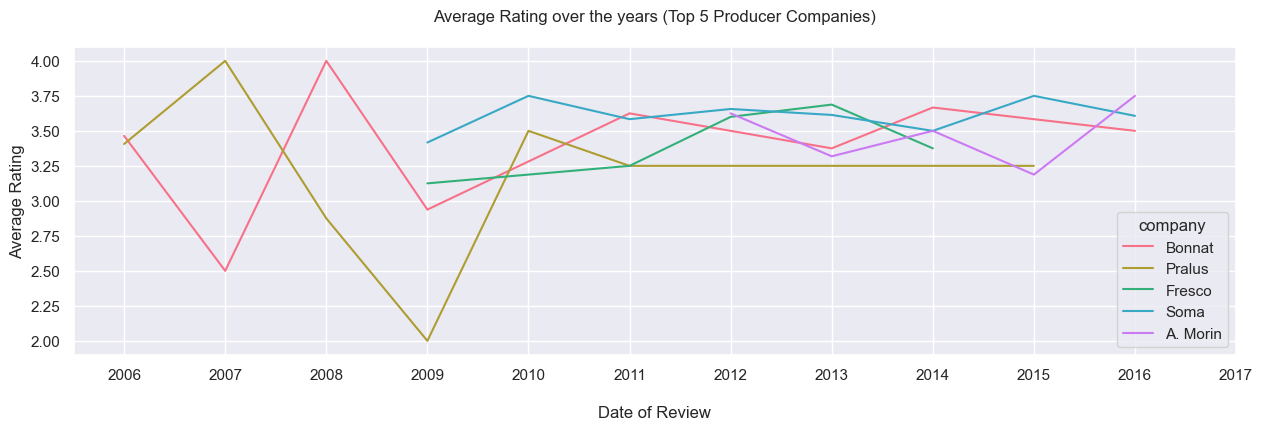

In [22]:
top5_dict = {}
for element in list(d['index']):
    temp = df[df['company']==element]
    top5_dict[element]=temp

top5_list = list(top5_dict.keys())

### Rating patterns over the years
d7 = df.groupby(['review_date', 'company']).aggregate({'rating':'mean'})
d7 = d7.reset_index()
d7 = d7[d7['company'].isin(top5_list)]

# Plotting
sns.set()
plt.figure(figsize=(15, 4))
ax = sns.lineplot(x='review_date', y='rating', hue="company", data=d7, palette="husl")
ax.set(xticks=d6.review_date.values)
plt.xlabel("\nDate of Review")
plt.ylabel("Average Rating")
plt.title("Average Rating over the years (Top 5 Producer Companies)\n")
plt.show()

#### Time and the Chocolate Companies
* Pralus and Bonnat were the earliest companies among these top 5 to be reviewed in 2006, while A. Morin was the latest at 2012
* Both Bonnat and Pralus started around with the same average rating in 2006 of around 3.40, but in the very next year of 2007, whle Pralus hit it's highest ever rating of 4.00, Bonnat slumped to it's lowest of 2.50. As of 2016, Bonnat stands 0.25 rating points clear of Pralus on the yearly average
* The worst rating among these top 5 came in 2009 when Pralus scored only a 2.00 on average. This was a result of Pralus's steady decline from 4.00 in 2007 to 2.00 in 2009 (The company could really use this insight to understand what went wrong during that period of 2 years)
* Coincidentally, the highest rating was just a year back, 2008 when Bonnat hit 4.00 (a feat Pralus had achieved in 2007)
* From 2011 to 2015, Pralus has shown consistency in the average ratings
* A. Morin was reviewed only for the years 2012, 2013, 2014, 2015 and 2016. As of 2016, it's got the highest average rating at 3.75
* Fresco has not been reviewed after 2014, and its last review gave it around 3.30 on average rating
* Soma, the largest producer of chocolate bars, showcases constant fluctuations
* Soma was first reviewed in 2009 where it got around 3.42. In it's latest review in 2016, it has a 3.61
* Soma's lowest rating came in 2009 (3.42) and this is still higher than the lowest ratings other companies have got over all years

## Following the Largest Chocolate Bar Producer (In terms of quantity) - Soma

In [23]:
# Preparing Soma for analysis
soma = df[df['company']=='Soma']

### Where does Soma get it's beans from ?

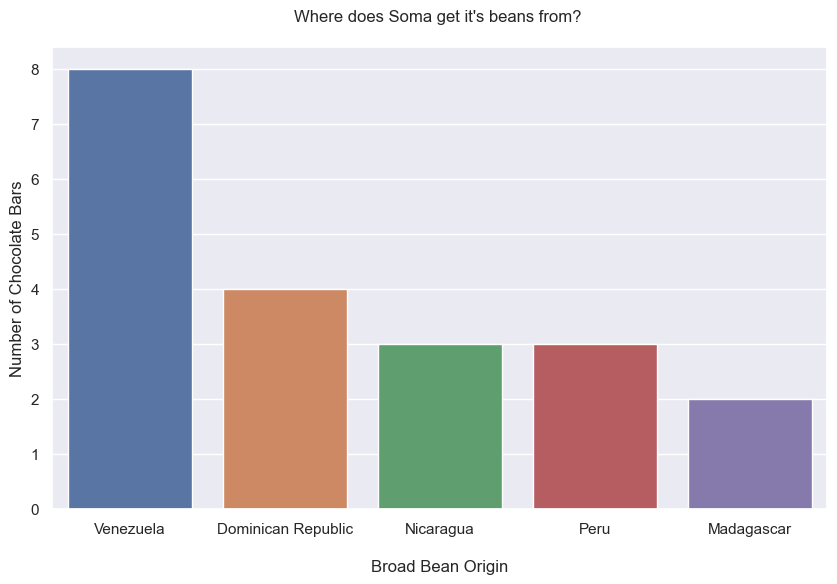

In [24]:
d3 = soma['broad_bean_origin'].value_counts().sort_values(ascending=False).head(5)
d3 = pd.DataFrame(d3)
d3 = d3.reset_index()
# Plotting
sns.set()
plt.figure(figsize=(10, 6))
sns.barplot(x='index', y='broad_bean_origin', data=d3)
plt.xlabel("\nBroad Bean Origin")
plt.ylabel("Number of Chocolate Bars")
plt.title("Where does Soma get it's beans from? \n")
plt.show()

* Venezuela is the largest provider of Soma's beans.

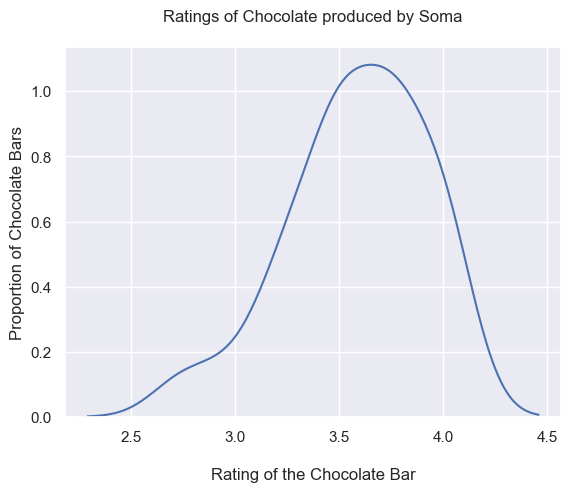

In [25]:
### How are ratings of Chocolate bars by Soma ?

sns.kdeplot(x=soma['rating'])
plt.xlabel("\nRating of the Chocolate Bar")
plt.ylabel("Proportion of Chocolate Bars")
plt.title("Ratings of Chocolate produced by Soma\n")
plt.show()

* Soma has a major proportion of its bars rated from satisfactory levels to really high. So, they do produce some **good** chocolate.

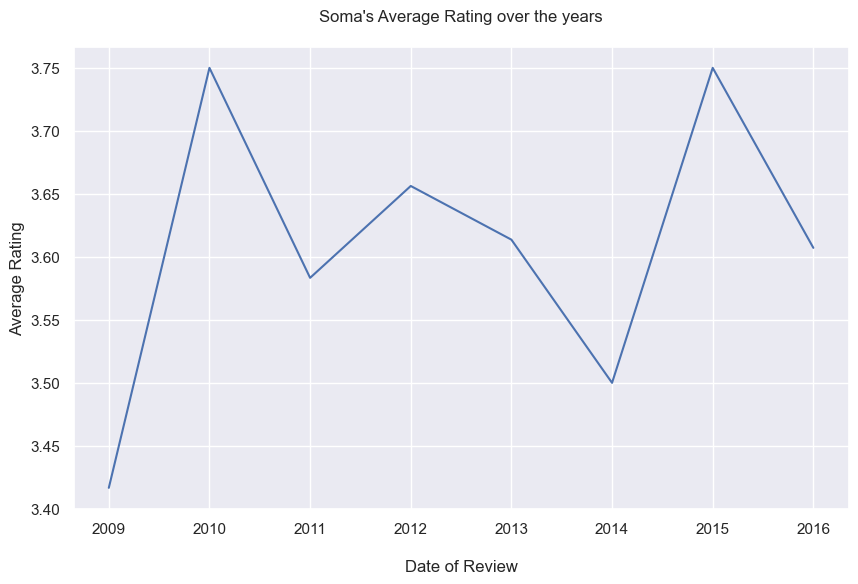

In [26]:
### Soma's performance over the years
d4 = soma.groupby('review_date').aggregate({'rating':'mean'})
d4 = d4.reset_index()
# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x='review_date', y='rating', data=d4)
plt.xlabel("\nDate of Review")
plt.ylabel("Average Rating")
plt.title("Soma's Average Rating over the years\n")
plt.show()

In [27]:
df.head(10)

,company,specific_bean_origin_or_bar_name,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_bean_origin
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,Trinitario,Sao Tome
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,Trinitario,Togo
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,Trinitario,Togo
3,A. Morin,Akata,1680,2015,0.70,France,3.50,Trinitario,Togo
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,Trinitario,Peru
5,A. Morin,Carenero,1315,2014,0.70,France,2.75,Criollo,Venezuela
6,A. Morin,Cuba,1315,2014,0.70,France,3.50,Trinitario,Cuba
7,A. Morin,Sur del Lago,1315,2014,0.70,France,3.50,Criollo,Venezuela
8,A. Morin,Puerto Cabello,1319,2014,0.70,France,3.75,Criollo,Venezuela
9,A. Morin,Pablino,1319,2014,0.70,France,4.00,Trinitario,Peru


#### Re-analyzing Soma Ratings through Time

* The worst average rating Soma ever got came in the year 2009 at 3.42, when it was first reviewed
* The highest average rating achieved came in 2010 at 3.75 (a significant rise from it's nadir the previous year)
* Between 2012 and 2014, Soma's average rating saw a slump which revived after
* 3.75 was achieved in 2015 again; it slumped to 3.61 in 2016

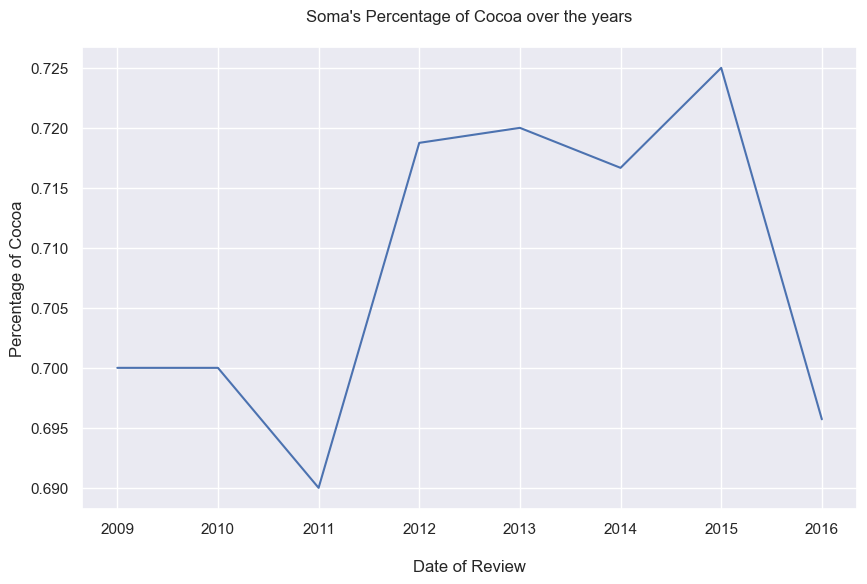

In [28]:
# Soma's performance over the years
d4 = soma.groupby('review_date').aggregate({'cocoa_percent':'mean'})
d4 = d4.reset_index()
# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x='review_date', y='cocoa_percent', data=d4)
plt.xlabel("\nDate of Review")
plt.ylabel("Percentage of Cocoa")
plt.title("Soma's Percentage of Cocoa over the years\n")
plt.show()

#### Cocoa percent in Soma chocolates over Time
* First review in 2009 showed 70% cocoa
* The lowest percentage of cocoa in a Soma bar was in 2011 at 69%
* In 2015, Soma had the highest ever cocoa percent in their chocolate bar at 72.5%
* Latest review in 2016 discloses 69.6% cocoa in Soma's chocolate bars

## Categorizing Chocolate based on Ratings
#### How many Chocolate bars are above or below 'Satisfactory levels' ?

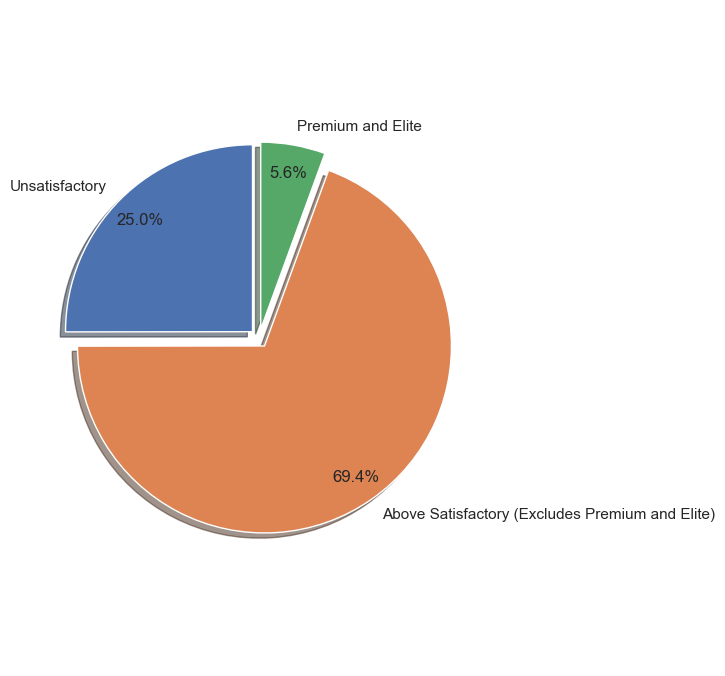

In [29]:
# Chocolate Bar levels

unsatisfactory = df[df['rating'] < 3.0]
satisfactory = df[(df['rating'] >= 3.0) & (df.rating < 4)]
pre_elite = df[df['rating'] >= 4.0]
label_names=['Unsatisfactory','Above Satisfactory (Excludes Premium and Elite)','Premium and Elite']
sizes = [unsatisfactory.shape[0],satisfactory.shape[0],pre_elite.shape[0]]
# Now let's make the donut plot
explode = (0.05,0.05,0.05)
#my_circle=plt.Circle((0,0),0.7,color='white')
plt.figure(figsize=(7,7))
plt.pie(sizes,labels=label_names,explode=explode,autopct='%1.1f%%',pctdistance=0.85,startangle=90,shadow=True)
fig=plt.gcf()
#fig.gca().add_artist(my_circle)
plt.axis('equal')
plt.tight_layout()
plt.show()

* This pie plot affirms that premium and elite chocolate is very rare, at only 5.6%.
* 75% of the chocolate bars in the study belong to 'Above Satisfactory'('premium and elite' are also a part of this category).
* And, 25% of the chocolate bars that have been rated have ratings under 3.0.

### Rating Distributions

Rating: 3.5 Reviews: 392
Rating: 3.0 Reviews: 341
Rating: 3.25 Reviews: 303
Rating: 2.75 Reviews: 259
Rating: 3.75 Reviews: 210
Rating: 2.5 Reviews: 127
Rating: 4.0 Reviews: 98
Rating: 2.0 Reviews: 32
Rating: 2.25 Reviews: 14
Rating: 1.5 Reviews: 10
Rating: 1.0 Reviews: 4
Rating: 1.75 Reviews: 3
Rating: 5.0 Reviews: 2


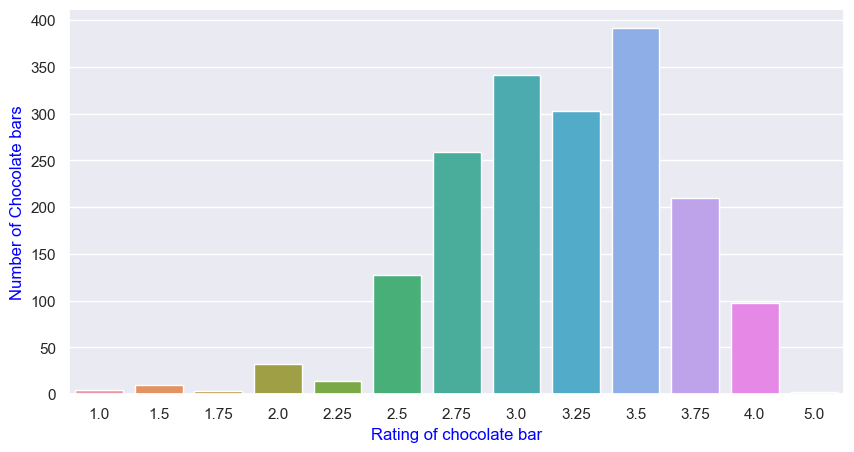

In [30]:
# The counts of each rating

r=list(df['rating'].value_counts())
rating=df['rating'].value_counts().index.tolist()
rat=dict(zip(rating,r))
for key,val in rat.items():
    print ('Rating:',key,'Reviews:',val)
plt.figure(figsize=(10,5))
sns.countplot(x='rating',data=df)
plt.xlabel('Rating of chocolate bar',size=12,color='blue')
plt.ylabel('Number of Chocolate bars',size=12,color='blue')
plt.show()

* Most bars have been rated at 3.5.
* Only 2 bars are rated at 5.0 (elite). Both belong to **Amedei**.

## What is the relation between 'Cocoa Percent' and 'Rating'?

<p> Is there any correlation between Cocoa Percent and Rating of the bar? 
    <br>
    If it is, is that a positive correlation or a negative one?
    <br>
    Can we predict rating of a bar given it's cocoa percentage?</p>

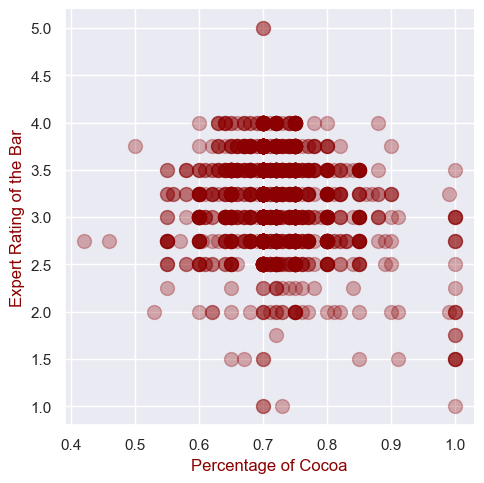

In [31]:
# Cocoa Percent and Rating

sns.lmplot(x='cocoa_percent',y='rating',fit_reg=False,scatter_kws={"color":"darkred","alpha":0.3,"s":100},data=df)
plt.xlabel('Percentage of Cocoa',size=12,color='darkred')
plt.ylabel('Expert Rating of the Bar',size=12,color='darkred')
plt.show()

#### Cocoa Percent versus Rating - Reading the Scatterplot above
* No evident correlation. 
* The density of the graph is highest between 65% and 80% of cocoa
* Chocolate bars with low cocoa percentage(less than 50%) and high cocoa percentage(above 90%) are less in number, but the most important fact is that most of these chocolate bars have a rating of less than 3,i.e they have been deemed 'Unsatisfactory'
* **Seems like people do not prefer very low or very high cocoa percentages in their chocolate!**

<p>From the scatter plot above, we can infer that it would not be a good idea to guess a chocolate's rating based on its Cocoa Percentage.</p>

## Where are the Best Cocoa Beans grown?

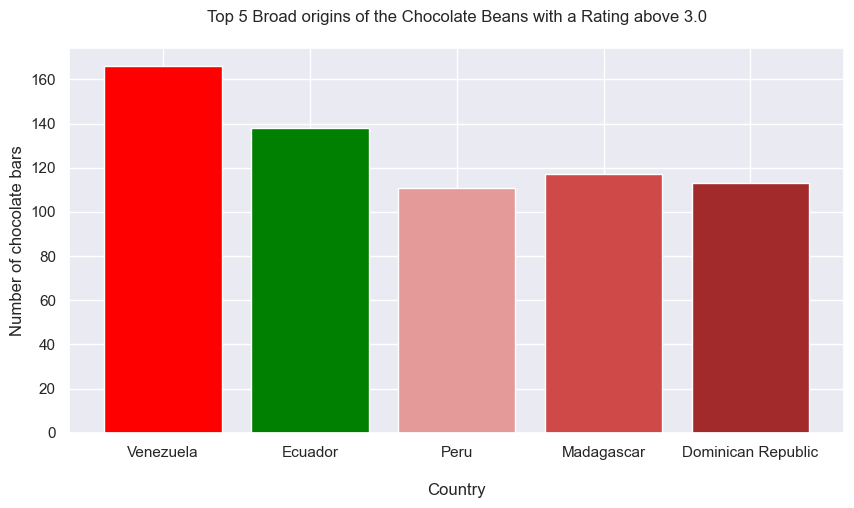

{'Venezuela': 166, 'Ecuador': 138, 'Peru': 111, 'Madagascar': 117, 'Dominican Republic': 113}


In [32]:
#to get the indices
countries=df['broad_bean_origin'].value_counts().index.tolist()[:5]
# countries has the top 5 countries in terms of reviews
satisfactory={} # empty dictionary
for j in countries:
    c=0
    b=df[df['broad_bean_origin']==j]
    br=b[b['rating']>=3] # rating more than 4
    for i in br['rating']:
        c+=1
        satisfactory[j]=c    

# Code to visualize the countries that give best cocoa beans
li=satisfactory.keys()
plt.figure(figsize=(10,5))
plt.bar(range(len(satisfactory)), satisfactory.values(), align='center',color=['red','green','#e59a9a','#d04949','#a22a2a'])
plt.xticks(range(len(satisfactory)), list(li))
plt.xlabel('\nCountry')
plt.ylabel('Number of chocolate bars')
plt.title("Top 5 Broad origins of the Chocolate Beans with a Rating above 3.0\n")
plt.show()

print(satisfactory)

Venezuela has the largest number of chocolate bars rated above 3.0

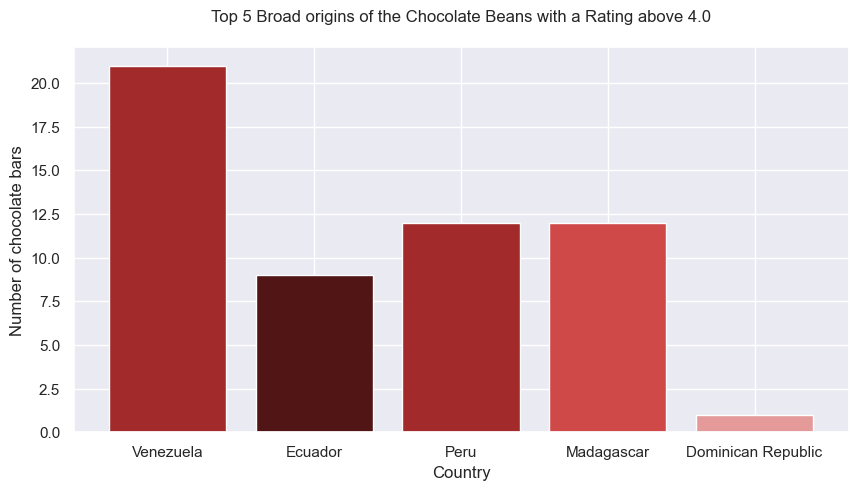

{'Venezuela': 21, 'Ecuador': 9, 'Peru': 12, 'Madagascar': 12, 'Dominican Republic': 1}


In [33]:
#to get the indices
countries=df['broad_bean_origin'].value_counts().index.tolist()[:5]
# countries has the top 5 countries in terms of reviews
best_choc={} # empty dictionary
for j in countries:
    c=0
    b=df[df['broad_bean_origin']==j]
    br=b[b['rating']>=4] # rating more than 4
    for i in br['rating']:
        c+=1
        best_choc[j]=c 

# Code to visualize the countries that give best cocoa beans
li=best_choc.keys()
plt.figure(figsize=(10,5))
plt.bar(range(len(best_choc)), best_choc.values(), align='center',color=['#a22a2a','#511515','#a22a2a','#d04949','#e59a9a'])
plt.xticks(range(len(best_choc)), list(li))
plt.xlabel('Country')
plt.ylabel('Number of chocolate bars')
plt.title("Top 5 Broad origins of the Chocolate Beans with a Rating above 4.0\n")
plt.show()

print(best_choc)

* So, here we see that the best cocoa beans are also grown in Venezuela.
* There are 21 bars from Venezuela that have a rating of 4 and above.

## Analysis of the Producing Countries!!

Top Chocolate Producing Countries in the World

U.S.A.    764
France    156
Canada    125
U.K.       96
Italy      63
Name: company_location, dtype: int64


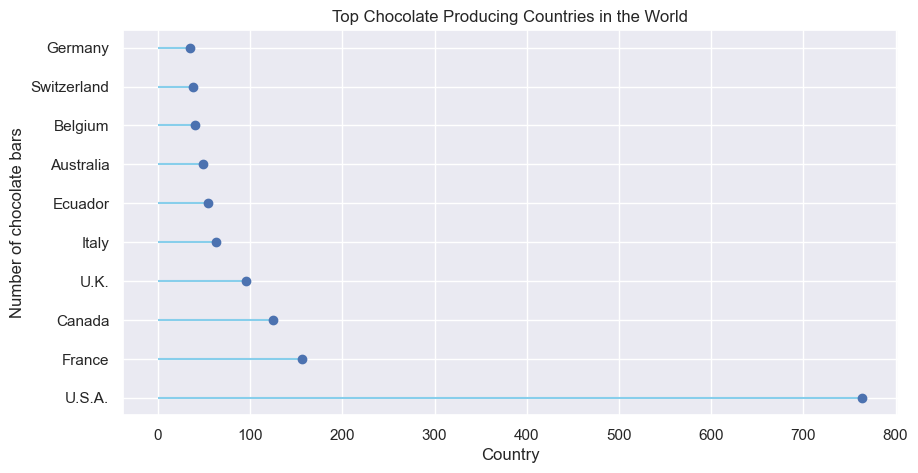

In [34]:
# Countries

print ('Top Chocolate Producing Countries in the World\n')
country=list(df['company_location'].value_counts().head(10).index)
choco_bars=list(df['company_location'].value_counts().head(10))
prod_ctry=dict(zip(country,choco_bars))
print(df['company_location'].value_counts().head())

plt.figure(figsize=(10,5))
plt.hlines(y=country,xmin=0,xmax=choco_bars,color='skyblue')
plt.plot(choco_bars,country,"o")
plt.xlabel('Country')
plt.ylabel('Number of chocolate bars')
plt.title("Top Chocolate Producing Countries in the World")
plt.show()

U.S.A produces way more chocolate companies than any other country has according to this data<br>

Would it seem like a decent guess if we said that U.S.A consumes most chocolate as 
<br>*'More the demand, more the production!'*.<br>
**Let's leave that to speculation!**

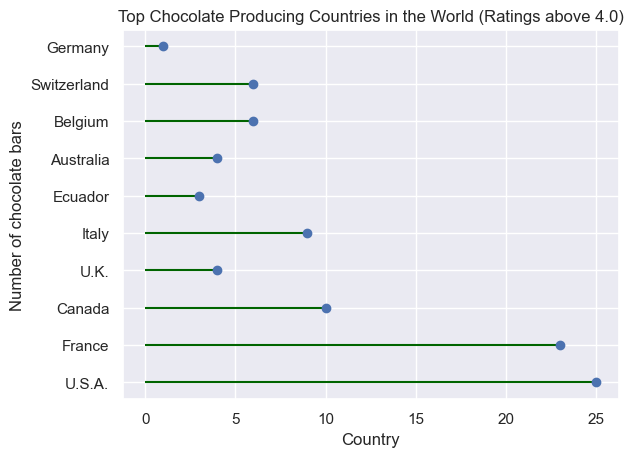

{'U.S.A.': 25, 'France': 23, 'Canada': 10, 'U.K.': 4, 'Italy': 9, 'Ecuador': 3, 'Australia': 4, 'Belgium': 6, 'Switzerland': 6, 'Germany': 1}


In [35]:
#reusing code written before
countries=country
best_choc={} # empty dictionary
for j in countries:
    c=0
    b=df[df['company_location']==j]
    br=b[b['rating']>=4] # rating more than 4
    for i in br['rating']:
        c+=1
        best_choc[j]=c    
# Code to visualize the countries that produce the best choclates

li=best_choc.keys()
# The lollipop plot
plt.hlines(y=li,xmin=0,xmax=best_choc.values(),color='darkgreen')
plt.plot(best_choc.values(),li,"o")
plt.xlabel('Country')
plt.ylabel('Number of chocolate bars')
plt.title("Top Chocolate Producing Countries in the World (Ratings above 4.0)")
plt.show()
print(best_choc)

### Consider Ratings and divide them into different categories and plot a pie chart

Double-click __here__ for the solution.
<!--
label = ['Disappointing','Satisfactory',' Premium and Elite']

disapoint = df[df['rating']<2]
satisfactory = df[(df['rating']>=2.0) &(df['rating']<3.0)]
premium_elite = df[df['rating']>=3.0]

x = [disapoint.shape[0],satisfactory.shape[0],premium_elite.shape[0]]
plt.figure(figsize=(5,5))
plt.pie(x,labels=label)
plt.show()
-->

 ###  How we  can classify the chocolates into Dark, Normal chocolates.

## References
* https://www.kaggle.com/rtatman/chocolate-bar-ratings/kernels
* https://seaborn.pydata.org
* https://pandas.pydata.org